# TRABAJO INTEGRADOR
# DIPLOMATURA EN CIENCIAS SOCIALES COMPUTACIONALES
#### Estudiantes:
- Romina De León
- Matías Sarti
- Magali Wettstein

In [2]:
!pip install seaborn
!pip install scikit-learn
!pip install KMeans
!pip install geopandas


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import geopandas as gpd



     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for KMeans
Failed to build KMeans
  Running setup.py install for KMeans: started
  Running setup.py install for KMeans: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [19 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-cpython-310\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-cpython-310\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-cpython-310\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-cpython-310\kmeans
  running build_ext
  building 'kmeans/lib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Mic

In [4]:
!pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 7.7 MB/s eta 0:00:00


El presente informe tiene por objetivo presentar una evaluación actualizada de la notificación de
casos de Tuberculosis (TB) en Argentina durante el período 2019-2021.
La información utilizada es
resultante de la notificación de casos que se realiza a través del Sistema Nacional de Vigilancia de
la Salud (SNVS 2.0), que permite el reporte individual de los casos por parte de los servicios de salud
a lo largo de todo el país, de manera remota e inmediata.
Para el presente documento se utilizó la información exportada 31 de agosto de 2023 del SNVS
2.0, el cual contiene los casos registrados y validados de 24 jurisdicciones del país para los años 2019,2020 y 2021.

In [5]:
# Cargar el conjunto de datos
fileurl = 'https://github.com/rominicky/diplocssoc/raw/main/TBC-NOTIFICACION_2019al2021.xlsx'
df = pd.read_excel(fileurl)

In [68]:
df.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,ESQUEMA,TRATAMIENTO_2,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA
258051,5334200,2020-12-17,51,1956-03-25,F,12207122,1956-03-21,64.0,200.0,Argentina,...,NaN,2HRZE / 4HR,2021-12-29,NaT,NaN,NaN,NaT,NaN,NaN,Antes
258050,5334200,2020-12-17,51,1956-03-25,F,12207122,1956-03-21,64.0,200.0,Argentina,...,NaN,2HRZE / 4HR,2021-12-29,NaT,NaN,NaN,NaT,NaN,NaN,Antes
208818,1064658,2020-06-12,24,1979-12-05,M,27508918,1979-12-05,40.0,NaN,NaN,...,NaN,2HRZE / 4HR,2020-04-25,2020-06-12,NaN,NaN,NaT,NO,NaN,Antes
443519,531522,2019-01-23,4,1991-07-17,F,37273130,1991-07-17,27.0,200.0,Argentina,...,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes
443518,531522,2019-01-23,4,1991-07-17,F,37273130,1991-07-17,27.0,200.0,Argentina,...,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes
443520,531522,2019-01-23,4,1991-07-17,F,37273130,1991-07-17,27.0,200.0,Argentina,...,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes
279076,8691865,2021-03-12,10,1997-01-15,M,40095050,1997-01-15,24.0,200.0,Argentina,...,NaN,2HRZ / 4HR,2021-02-23,2021-09-03,NaN,NaN,NaT,NaN,NaN,Antes
441502,14559880,2021-06-11,23,2010-02-11,F,20060132,1968-03-25,41.0,200.0,Argentina,...,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes
441503,14559880,2021-06-11,23,2010-02-11,F,20060132,1968-03-25,41.0,200.0,Argentina,...,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes
437744,13945132,2021-06-03,22,2010-06-02,M,20766716,1969-07-12,40.0,200.0,Argentina,...,NaN,Sin información,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes


## Exploramos el Data Frame
¿Qué columnas tiene?¿Qué tipo de columnas son?

In [69]:
dimension = df.shape
print("Dimension del conjunto de datos:", dimension, "\n")

#Filas
print(f'Cantidad de filas: {df.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {df.shape[1]} \n')

# Columnas
columnas = df.columns
print("Columnas:", columnas, "\n")

# Tipos de datos de las columnas
tipos = df.dtypes
print("Tipos de datos:", tipos, "\n")

#Info de datos nulos
nulos = df.info()
print("Valores Nulos:", nulos, "\n")

Dimension del conjunto de datos: (221059, 66) 

Cantidad de filas: 221059

Cantidad de columnas: 66 

Columnas: Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 

1. Transformación de datos:

Antes de comenzar el análisis, fue necesario realizar algunas transformaciones en los datos, como la conversión de fechas en formatos adecuados, la codificación de variables categóricas (GRUPO EDAD), la eliminación de columnas irrelevantes y el manejo de valores faltantes, el agrega de nuevas columnas con el calculo del tiempo de demora.

In [70]:
# Convertir la columna fechas a tipo de dato datetime y para manejar fechas fuera de rango es utilizar el argumento errors='coerce' al llamar a pd.to_datetime().
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_PAPEL'] = pd.to_datetime(df['FECHA_PAPEL'], errors='coerce')
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], errors='coerce')
df['FECHA_CONSULTA'] = pd.to_datetime(df['FECHA_CONSULTA'], errors='coerce')
df['FECHA_INICIO_SINTOMA'] = pd.to_datetime(df['FECHA_INICIO_SINTOMA'], errors='coerce')
df['FECHA_INTERNACION'] = pd.to_datetime(df['FECHA_INTERNACION'], errors='coerce')
df['FIS'] = pd.to_datetime(df['FIS'], errors='coerce')
df['FTM'] = pd.to_datetime(df['FTM'], errors='coerce')
df['FECHA_ESTUDIO'] = pd.to_datetime(df['FECHA_ESTUDIO'], errors='coerce')
df['FECHA_RECEPCION'] = pd.to_datetime(df['FECHA_RECEPCION'], errors='coerce')
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_INICIO_TRAT'] = pd.to_datetime(df['FECHA_INICIO_TRAT'], errors='coerce')
df['FECHA_FIN_TRAT'] = pd.to_datetime(df['FECHA_FIN_TRAT'], errors='coerce')

In [71]:
# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FTM'
df['FECHA_DIAG'].fillna(df['FTM'], inplace=True)

# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_ESTUDIO'
df['FECHA_DIAG'].fillna(df['FECHA_ESTUDIO'], inplace=True)

# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_INICIO_TRAT'
df['FECHA_DIAG'].fillna(df['FECHA_INICIO_TRAT'], inplace=True)

# Ahora 'FECHA_DIAG' contiene los valores de 'FTM', 'FECHA_ESTUDIO' o 'FECHA_INICIO_TRAT' en ese orden de prioridad

# Reemplaza los valores faltantes en 'FECHA_PAPEL' con los de 'FECHA_APERTURA'
df['FECHA_PAPEL'].fillna(df['FECHA_APERTURA'], inplace=True)

Eliminar valores faltantes no siempre es la mejor opción, ya que puede resultar en una pérdida de información si hay datos valiosos en otras columnas de las filas eliminadas. En lugar de eliminar las filas con valores faltantes, se reemplaza esos valores con una estimación basada en los datos existentes. Por ejemplo, puedes usar la media, la mediana o algún otro método de imputación.

In [72]:
# Imputar los valores faltantes en 'EDAD_DIAGNOSTICO' con la mediana
median_age = df['EDAD_DIAGNOSTICO'].median()
df['EDAD_DIAGNOSTICO'].fillna(median_age, inplace=True)

In [73]:
# Ordena el DataFrame por 'FECHA_PAPEL' de manera ascendente
df.sort_values(by='FECHA_PAPEL', ascending=True, inplace=True)

# Elimina duplicados basados en todas las columnas excepto 'FECHA_PAPEL'
df.drop_duplicates(subset=df.columns.difference(['FECHA_PAPEL']), keep='first', inplace=True)


AISLAMIENTO SOCIAL PREVENTIVO Y OBLIGATORIO
Decreto 297/2020
DECNU-2020-297-APN-PTE - Disposiciones.
https://www.boletinoficial.gob.ar/detalleAviso/primera/227042/20200320

ARTÍCULO 2º.- Durante la vigencia del “aislamiento social, preventivo y obligatorio”, las personas deberán permanecer en sus residencias habituales o en la residencia en que se encuentren a las 00:00 horas del día 20 de marzo de 2020, momento de inicio de la medida dispuesta.

In [74]:
# Fecha de inicio de la pandemia
fecha_inicio_pandemia = pd.to_datetime('2020-03-20')

# Nueva columna llamada 'CLASIFICACION_PANDEMIA'
# con valores 'Antes' para fechas anteriores a la pandemia y 'Despues' para fechas posteriores o durante la pandemia
df['CLASIFICACION_PANDEMIA'] = df['FECHA_PAPEL'].apply(lambda x: 'Antes' if x < fecha_inicio_pandemia else 'Despues')


In [75]:
categorias_unicas = df['RESULTADO'].unique()
print(categorias_unicas)

['Positivo (+++)' 'Positivo (++)' nan 'Positivo' 'Negativo'
 'Se detecta patrón de bandas específicas' 'Positivo (+)'
 'Se detecta ADN del complejo Mycobacterium tuberculosis' 'Sensible'
 'Resistente' 'Indeterminado'
 'MTB detectado medio, resistencia a rifampicina no detectada'
 'No se detecta mutación' 'Positivo (1 a 19 colonias)'
 'Se detecta mutacion inhA'
 'No se detecta ADN del complejo Mycobacterium tuberculosis'
 'Se detecta mutación rpoB531' 'Contaminado' 'No procesada'
 'MTB detectado, resistencia a rifampicina no detectada' 'En estudio'
 'Se detecta mutación katG315' 'Positiva (contable)'
 'MTB detectado bajo, resistencia a rifampicina no detectada'
 'No se detecta patrón de bandas específicas' 'Se detecta mutacion katG'
 'MTB no detectado' 'MTB detectado, resistencia a rifampicina detectada'
 'MTB detectada. Resist a RIF NO detectada. Resist a INH NO detectada'
 'Se detecta mutacion gyrA' 'Se detecta mutacion rpoB'
 'Se detecta mutación rpoB526'
 'MTB detectado bajo, resist

El Data Frame tiene duplicados porque descarga para cada evento una fila por cada toma de muestra que se envio a analizar para confirmar el evento o como control del tratamiento

In [76]:
base= df.drop_duplicates(subset=['NRO_DOC', 'FECHA_PAPEL','RESULTADO'])

In [77]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")


Dimension del conjunto de datos: (66961, 66) 



El DF tienen para los 3 años que se analizan mas de los casos que se reportan habitualmente por año, por lo que nos hace suponer que varios casos tambien tienen diferente resultado de tratamiento. Lo ideal es clasificar la variable en confirmados y no confirmados para quedarnos solo con los confirmados
El problema es que la informacion muchas veces no se carga bien entonces si aplicamos eliminar por confirmados nos elimina mucho mas de los que son, por ello se consideran varías categorías


In [78]:
import pandas as pd

# clasificar las categorías en 'confirmados' y 'no confirmados' para la TBC

# Lista de categorías que consideramos como "confirmados"
categorias_confirmados = ['Positivo (+++)', 'Positivo (++)', 'Positivo',
 'Se detecta patrón de bandas específicas', 'Positivo (+)', 'Sensible'
 'Se detecta ADN del complejo Mycobacterium tuberculosis', 'Resistente',
 'Indeterminado',
 'MTB detectado medio, resistencia a rifampicina no detectada',
 'No se detecta mutación', 'Positivo (1 a 19 colonias)',
 'Se detecta mutacion inhA',
 'No se detecta ADN del complejo Mycobacterium tuberculosis',
 'Se detecta mutación rpoB531', 'Contaminado', 'No procesada',
 'MTB detectado, resistencia a rifampicina no detectada',
 'Se detecta mutación katG315', 'En estudio' 'Positiva (contable)',
 'MTB detectado bajo, resistencia a rifampicina no detectada',
 'No se detecta patrón de bandas específicas', 'Se detecta mutacion katG',
 'MTB no detectado', 'MTB detectado, resistencia a rifampicina detectada'
 'MTB detectada. Resist a RIF NO detectada. Resist a INH NO detectada',
 'Se detecta mutacion gyrA', 'Se detecta mutacion rpoB',
 'Se detecta mutación rpoB526',
 'MTB detectado bajo, resistencia a rifampicina detectada',
 'Se detecta mutación rpoB516',
 'MTB detectado muy bajo, resistencia a rifampicina no detectada',
 'Se detecta Mutación inhAP-15',
 'MTB detectado medio, resistencia a rifampicina detectada',
 'Se detecta mutación rrs',
 'MTB detectado  alto, resistencia a rifampicina no detectada',
 'Error/invalido/sin resultado',
 'MTB detectado (trazas), resistencia a rifampcina indeterminada'
 'Se detecta mutacion rrs',
 'MTB detectado, resistencia a rifampcina indeterminada',
 'MTB detectado bajo, resistencia a rifampcina indeterminada',
 'MTB detectado muy bajo, resistencia a rifampicina detectada',
 'MTB detectado alto, resistencia a rifampicina detectada',
 'MTB detectado muy bajo, resistencia a rifampcina indeterminada',
 'No detectable', 'Se detecta mutación inhAP-15/katG315',
 'Se detecta mutacion rpoB516/526', 'Se detecta mutacion gyrB']

# Agrega una nueva columna 'CLASIFICACION_TB' y clasifica como "confirmados" o "no confirmados"
base['CLASIFICACION_TB'] = base['RESULTADO'].apply(
    lambda x: 'Confirmados' if x in categorias_confirmados else 'No Confirmados'
)

# Ahora df contiene una nueva columna 'CLASIFICACION_TB' que clasifica en "confirmados" o "no confirmados"


C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_26952\1821538467.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['CLASIFICACION_TB'] = base['RESULTADO'].apply(


In [79]:
#Volvemos a eliminar duplicados segun clasificacion del caso
base= df.drop_duplicates(subset=['NRO_DOC', 'FECHA_PAPEL'])

In [80]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")

Dimension del conjunto de datos: (37596, 66) 



In [81]:
# Extrae el año de notificación
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year

# Nos quedamos solo con los años 2019-2020-2021
base = base.query('ANIO_NOTIFICACION in [2019, 2020, 2021]')

C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_26952\1583826920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year


In [82]:
# Define los límites de los rangos de edad
rangos_edad = [0, 18, 30, 45, 60, float('inf')]  # Define los rangos como desees

# Define las etiquetas para los grupos de edad
etiquetas_edad = ['0-18', '19-30', '31-45', '46-60', '61+']

# Crea la columna 'GRUPO_EDAD' utilizando la función cut para agrupar las edades
base['GRUPO_EDAD'] = pd.cut(df['EDAD_DIAGNOSTICO'], bins=rangos_edad, labels=etiquetas_edad)

In [84]:
base.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD
49274,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,2019-01-03,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60
20772,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,2019-01-02,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45
34299,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,2019-01-10,2019-12-23,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60
30774,578403,2019-05-07,19,2019-01-01,F,94620094,1983-05-06,35.0,200.0,Argentina,...,2018-10-30,NaT,NaN,ND,NaT,NO,NaN,Antes,2019,31-45
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45
458751,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,2019-01-08,NaT,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,2019-01-07,2019-08-09,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,2019-01-07,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30


In [85]:
# Calcula el tiempo de demora en días (puede ajustarse a otra unidad de tiempo)
#base['TIEMPO_DEMORA'] = (base['FECHA_DIAG'] - base['FECHA_INICIO_SINTOMA']).dt.days

# primero hago la diferencia entre 'FECHA_DIAG' y 'FECHA_INICIO_SINTOMA'
base['TIEMPO_DEMORA'] = (base['FECHA_DIAG'] - base['FECHA_INICIO_SINTOMA']).dt.days

# ahora calculo la media de los valores no negativos
media_tiempo_demora = base[base['TIEMPO_DEMORA'] >= 0]['TIEMPO_DEMORA'].mean()

# para los valores negativos reemplazo por la media
base['TIEMPO_DEMORA'] = base['TIEMPO_DEMORA'].apply(lambda x: x if x >= 0 else media_tiempo_demora)

In [87]:
print(base['TIEMPO_DEMORA'].head())

49274       0.000000
20772       7.000000
463326     37.236256
34299     333.000000
30774      18.000000
Name: TIEMPO_DEMORA, dtype: float64



2. Análisis descriptivo:
- Resumen estadístico de variables numéricas (edad, tiempo de diagnóstico, etc.).
- Distribuciones de variables categóricas (sexo, país de residencia, localidad, clasificacion del caso, resultado de tratamiento etc.).
- Gráficos de dispersión para identificar tendencias.
- Histogramas para visualizar la distribución de la edad de diagnóstico antes y después de la pandemia.
- Box plots para identificar valores atípicos.
-Análisis de correlación para determinar relaciones entre variables.

Si hizo una descripción de las variables tipo objeto, la cantidad de filas que tienen el dato (count) cantidad de valores unicos dentro de cada variable(unique) la categoria que se aparece con mayor frecuencia y la cantidad de veces que aparece (top y freq)
## De este analisis podemos ver que conviene quedarnos solo con las variable del tipo obejto que son:????

In [88]:
base.describe(include=['O'])


,SEXO,NRO_DOC,PAIS_RESIDENCIA,PROVINCIA_RESIDENCIA,ID_DEPTO_INDEC_RESIDENCIA,DEPARTAMENTO_RESIDENCIA,ID_LOC_INDEC_RESIDENCIA,LOCALIDAD_RESIDENCIA,CALLE_DOMICILIO,NUMERO_DOMICILIO,...,RESULTADO_TRATAMIENTO,CLASIF_INICIO_TRAT,MODALIDAD_TRAT,ESQUEMA,TRATAMIENTO_2,MOTIVO_CONSULTA,CURADO_MEJORADO,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA
count,36391,36448,34568,36303,36448,35281,36202,36202,34753,28726,...,29577,28862,29577,1043,29577,1794,6690,11703,202,36448
unique,4,34031,5,25,484,409,1347,1575,19637,5732,...,7,6,4,758,6,4,3,2,14,2
top,M,22458691,Argentina,Buenos Aires,6427,Capital,,*SIN DATO* (*SIN DATO*),0,0,...,Tratamiento completo,Nuevo,Autoadministrado,3HZRSE/5HRE,2HRZE / 4HR,Sintomático Respiratorio,SI,NO,Wichí,Despues
freq,20501,6,34555,18847,2176,2775,9719,9719,331,4639,...,11312,25345,14050,43,18961,1490,4431,11415,70,20377


In [89]:
df.columns

Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 'ESTABLECIMIENTO_DIAG', 'ID_LOC_INDEC_DIAG',
       'LOCALIDAD_DIAG', 'ANTECEDENTE_EPIDEMIOLOGICO',
       'TIPO

In [90]:
# estadísticas descriptivas
descripcion = base[['TIEMPO_DEMORA', 'EDAD_DIAGNOSTICO']].describe()

print(descripcion)

       TIEMPO_DEMORA  EDAD_DIAGNOSTICO
count   36448.000000      36448.000000
mean       37.236256         37.116632
std       281.617912         21.554091
min         0.000000       -944.000000
25%         0.000000         23.000000
50%        37.236256         34.000000
75%        37.236256         50.000000
max     43851.000000        919.000000


se puede ver que hay valores negativos...no deberia los investigamos
## tomar decision de que hacer los eliminamos?
modifique antes para eliminar el error negativo en tiempo demora

In [91]:
# Contar cuántos valores negativos hay en 'TIEMPO_DEMORA'
valores_negativos_tiempo = (base['TIEMPO_DEMORA'] < 0).sum()

# Contar cuántos valores negativos hay en 'EDAD'
valores_negativos_edad = (base['EDAD_DIAGNOSTICO'] < 0).sum()

print(f'Valores negativos en TIEMPO_DEMORA: {valores_negativos_tiempo}')
print(f'Valores negativos en EDAD: {valores_negativos_edad}')

Valores negativos en TIEMPO_DEMORA: 0
Valores negativos en EDAD: 8


para tratar de ver porque da negativo :(


### en el caso de tiempo de demora no estoy entendiendo porque en estos los calcula negativo, tal vez podríamos reemplazarlo con la media o mediana???



In [93]:
valores_negativos_edad = base[base['EDAD_DIAGNOSTICO'] < 0]
valores_negativos_edad

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA
22705,566565,2019-04-10,15,2019-01-14,M,4540967,1945-10-24,-926.0,200.0,Argentina,...,NaT,NaN,NO,NaT,NaN,NaN,Antes,2019,NaN,7.000000
434597,694439,2019-12-14,50,2019-12-11,F,17013581,1964-02-26,-944.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,NaN,37.236256
460964,692021,2019-12-10,50,2019-12-23,M,24307956,1975-04-17,-774.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,NaN,37.236256
465857,704167,2020-01-07,2,2019-12-31,M,95538626,1952-07-25,-32.0,200.0,Argentina,...,NaT,NaN,SI,2019-12-31,NaN,NaN,Antes,2019,NaN,37.236256
163555,717040,2020-01-30,5,2020-01-29,F,20101893,1968-08-30,-68.0,200.0,Argentina,...,NaT,NaN,SI,2020-07-23,NaN,NaN,Antes,2020,NaN,43851.000000
180465,740550,2020-03-06,10,2020-03-06,M,24825273,1975-10-01,-75.0,200.0,Argentina,...,NaT,NaN,NO,NaT,NaN,NaN,Antes,2020,NaN,37.236256
195932,888191,2020-05-05,19,2020-04-01,F,4893744,1950-07-16,-1.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Despues,2020,NaN,37.236256
274005,6936514,2021-01-27,4,2021-01-27,F,40008300,1996-12-27,-794.0,200.0,Argentina,...,NaT,NaN,SI,2021-07-25,NaN,NaN,Despues,2021,NaN,0.000000


In [94]:
# Calcula la diferencia de edad
diferencia_edad = (base['FECHA_APERTURA'] - base['FECHA_NACIMIENTO']).dt.days

# Reemplaza valores negativos en 'EDAD_DIAGNOSTICO' con la diferencia anterior
base.loc[base['EDAD_DIAGNOSTICO'] < 0, 'EDAD_DIAGNOSTICO'] = diferencia_edad


In [95]:
# Compruebo si se realizo bien el cambio
valores_negativos = base[base['EDAD_DIAGNOSTICO'] < 0]

# Hago un if para que se actualizo bien
if valores_negativos.empty:
    print("Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.")
else:
    print("Aún quedan valores negativos en 'EDAD_DIAGNOSTICO'. Revisa la actualización.")


Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.


In [96]:
base.head(50)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA
49274,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60,0.000000
20772,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,7.000000
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.236256
34299,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,2019-12-23,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60,333.000000
30774,578403,2019-05-07,19,2019-01-01,F,94620094,1983-05-06,35.0,200.0,Argentina,...,NaT,NaN,ND,NaT,NO,NaN,Antes,2019,31-45,18.000000
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.236256
458751,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,NaT,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45,37.236256
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN,37.236256
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,2019-08-09,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45,37.236256
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,37.236256


# Hacemos una serie de graficos y tablas para interpretar los datos

> Bloque con sangría



In [97]:
# Convierte la columna 'ANIO_NOTIFICACION' a formato datetime
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['ANIO_NOTIFICACION'], format='%Y')

# Luego, puedes agrupar por año y momento de diagnóstico
tabla_agrupada = base.groupby([base['ANIO_NOTIFICACION'].dt.year, 'CLASIFICACION_PANDEMIA']).size().unstack(fill_value=0)

# Cambia los nombres de las columnas para mayor claridad
tabla_agrupada.columns = ['Antes de la pandemia', 'Después de la pandemia']

# Resetea el índice para tener una tabla con las columnas 'Año', 'Antes de la pandemia' y 'Después de la pandemia'
tabla_agrupada = tabla_agrupada.reset_index()

# Cambia el nombre de la columna del año
tabla_agrupada = tabla_agrupada.rename(columns={'ANIO_NOTIFICACION': 'Año'})

# Imprime la tabla agrupada
print(tabla_agrupada)

    Año  Antes de la pandemia  Después de la pandemia
0  2019                 13131                       0
1  2020                  2940                    7994
2  2021                     0                   12383


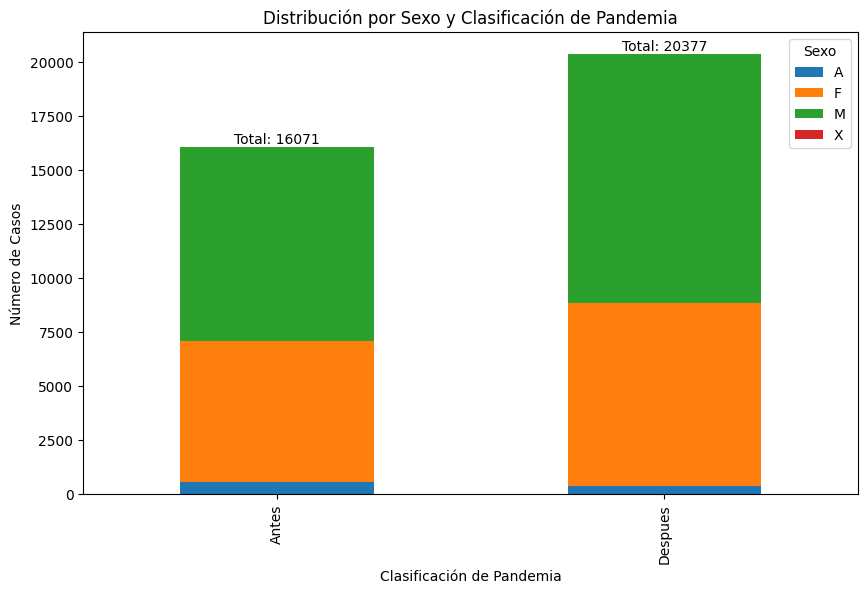

In [98]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupa los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y cuenta el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'SEXO']).size().unstack(fill_value=0)

# Calcula el total de casos por sexo
total_por_sexo = base.groupby('CLASIFICACION_PANDEMIA').size()

# Crea un gráfico de barras apiladas
ax = grupo_distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Número de Casos')
plt.title('Distribución por Sexo y Clasificación de Pandemia')

# Agrega una leyenda
plt.legend(title='Sexo')

# Muestra el total de casos por sexo en la parte superior de las barras
for i, total in enumerate(total_por_sexo):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Muestra el gráfico
plt.show()


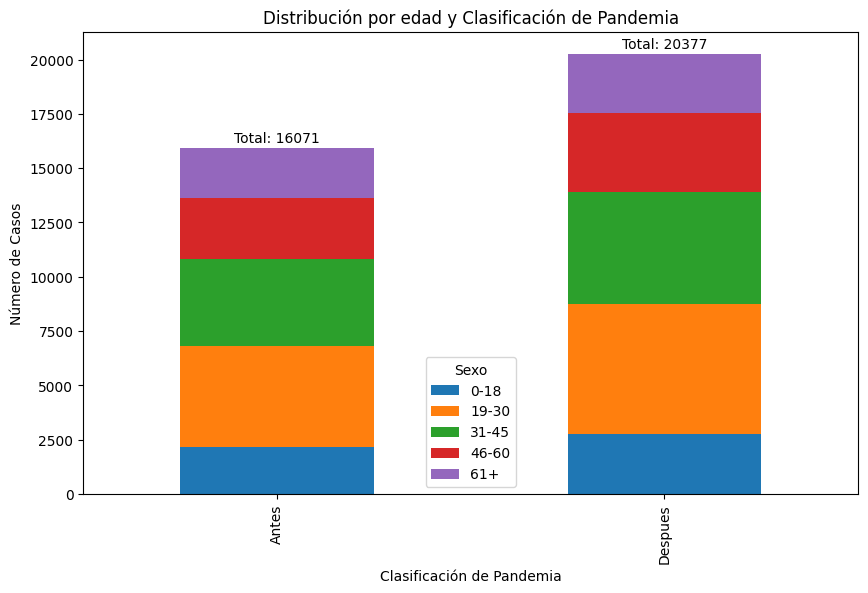

In [99]:

# Agrupa los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y cuenta el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'GRUPO_EDAD'],  observed=False).size().unstack(fill_value=0)

# Calcula el total de casos por sexo
total_por_edad = base.groupby('CLASIFICACION_PANDEMIA').size()

# Crea un gráfico de barras apiladas
ax = grupo_distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Número de Casos')
plt.title('Distribución por edad y Clasificación de Pandemia')

# Agrega una leyenda
plt.legend(title='Sexo')

# Muestra el total de casos por sexo en la parte superior de las barras
for i, total in enumerate(total_por_edad):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Muestra el gráfico
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


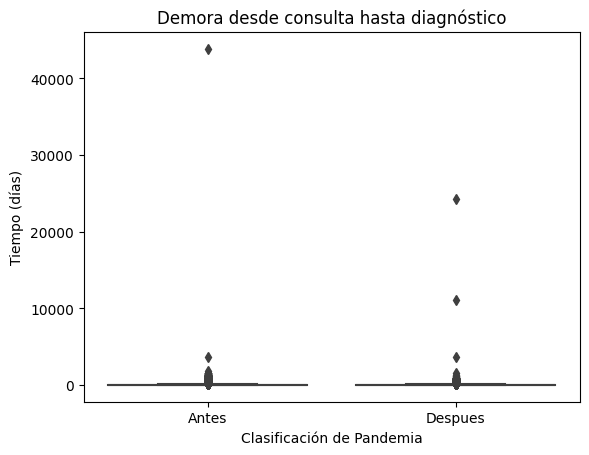

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')


# Crear el diagrama de caja por categoría
sns.boxplot(x='CLASIFICACION_PANDEMIA', y='TIEMPO_DEMORA', data=base)

# Añadir título y etiquetas a los ejes
plt.title('Demora desde consulta hasta diagnóstico')
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Tiempo (días)')

# Mostrar el diagrama
plt.show()

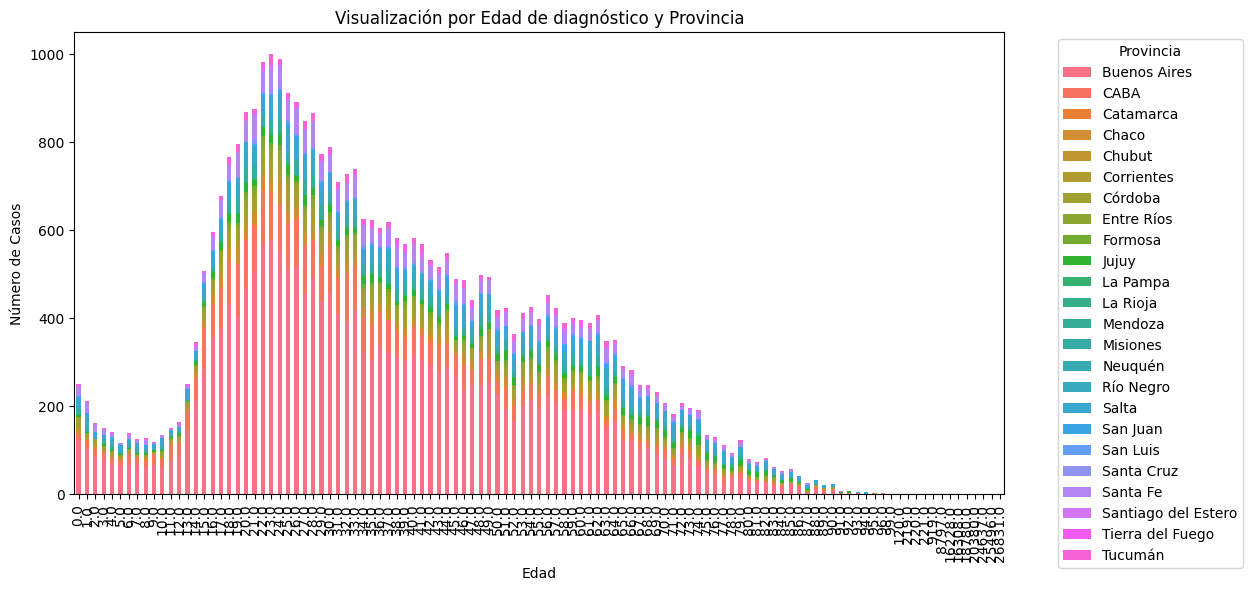

In [102]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['PROVINCIA_RESIDENCIA'] != "*sin dato*")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Podríamos hacer algun gráfico georreferenciado con las localidades de residencia, que opinan?

In [103]:
!pip install contextily


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


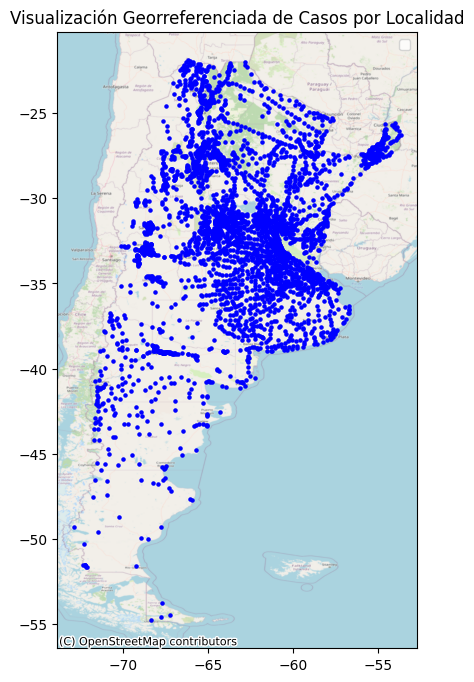

In [104]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import contextily as ctx

# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.31/download/localidades-censales.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("localidades-censales.geojson", "wb") as f:
    f.write(response.content)

# Cargop el archivo GeoJSON
gdf = gpd.read_file("localidades-censales.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(base, left_on='nombre', right_on='LOCALIDAD_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker= 'o', color='blue', markersize=5)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('Visualización Georreferenciada de Casos por Localidad')
plt.legend()
plt.show()


# lo que vienen lo deje para que pensemos que podemos hacer con eso no es necesario todo algo

3. Aprendizaje supervisado:

Si deseas predecir la demora en el diagnóstico, puedes usar técnicas de aprendizaje supervisado como regresión lineal o regresión logística. Tu variable objetivo podría ser el tiempo de diagnóstico, y las características podrían incluir sexo, edad, antecedentes epidemiológicos, etc. Debes dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

In [105]:
from sklearn.impute import SimpleImputer  # Importar el imputador

# Dividir los datos en conjunto de entrenamiento y prueba
X = base[['EDAD_DIAGNOSTICO']]  # Característica de entrada (en este caso, edad de diagnóstico)
y = base['TIEMPO_DEMORA']  # Variable objetivo (tiempo de diagnóstico)

# Imputar valores faltantes en 'y' usando la media
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo
score = model.score(X_test, y_test)
print(f'R-cuadrado del modelo: {score}')

R-cuadrado del modelo: -0.024164626751872698





4. Aprendizaje no supervisado:

El aprendizaje no supervisado puede ser útil para identificar patrones en los datos. Podrías usar técnicas de clustering como K-means para agrupar pacientes en función de características similares, lo que podría ayudar a identificar subgrupos de pacientes con demoras similares en el diagnóstico.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if 

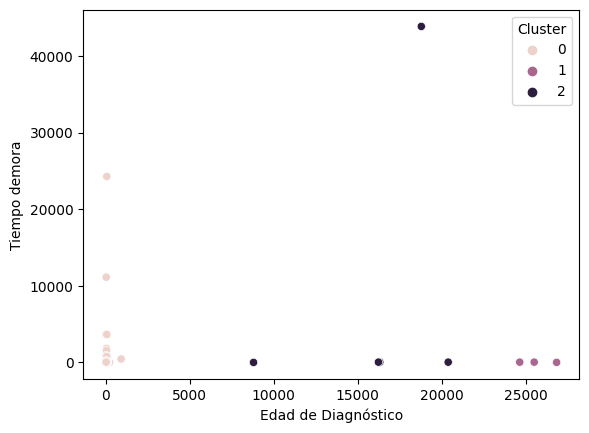

In [106]:
# Supongamos que deseas agrupar en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
base['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters
sns.scatterplot(data=base, x='EDAD_DIAGNOSTICO', y='TIEMPO_DEMORA', hue='Cluster')
plt.xlabel('Edad de Diagnóstico')
plt.ylabel('Tiempo demora')
plt.show()




5. Georreferenciación:

Si tienes información de ubicación en tus datos, puedes usarla para realizar análisis espaciales. Por ejemplo, podrías crear mapas de calor que muestren la distribución geográfica de los pacientes y sus tiempos de diagnóstico.

In [107]:
df.columns


Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 'ESTABLECIMIENTO_DIAG', 'ID_LOC_INDEC_DIAG',
       'LOCALIDAD_DIAG', 'ANTECEDENTE_EPIDEMIOLOGICO',
       'TIPO

In [108]:
df['ID_LOC_INDEC_RESIDENCIA'
].dtype

dtype('O')

lo que sigue lo hice más arroba

In [109]:
# Crear un GeoDataFrame a partir de tus datos
gdf = gpd.GeoDataFrame(df,
                        geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

# Visualizar los datos en un mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.show()


AttributeError: 'DataFrame' object has no attribute 'LONGITUD'


6. Grafos:

Los grafos pueden utilizarse para representar relaciones entre los pacientes o establecimientos médicos. Por ejemplo, podrías crear un grafo que muestre cómo los pacientes se refieren entre sí o cómo los establecimientos están conectados.

Para realizar estos análisis, necesitarás conocimientos en programación (por ejemplo, Python) y bibliotecas como Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, y herramientas de georreferenciación como Geopandas. Además, la elección de técnicas específicas dependerá de los objetivos y los datos disponibles en tu conjunto de datos.

In [110]:
import networkx as nx


In [111]:
# Crear un grafo no dirigido Dependiendo de tus datos y de lo que quieras analizar,
#puedes crear un grafo dirigido o no dirigido. Por ejemplo, si quieres representar relaciones entre pacientes,
 #un grafo no dirigido puede ser apropiado.
G = nx.Graph()


In [112]:
# Agregar nodos al grafo Supongamos que tienes datos que representan relaciones entre pacientes,
#puedes agregar nodos y aristas al grafo de la siguiente manera:
for paciente in df['NRO_DOC']:
    G.add_node(paciente)

# Agregar aristas (relaciones) entre pacientes
for paciente1, paciente2 in zip(base['NRO_DOC'], base['CLASIFICACION_PANDEMIA']):
    G.add_edge(paciente1, paciente2)


 Realizar análisis en el grafo:

Una vez que tengas tu grafo construido, puedes realizar varios análisis. Aquí hay ejemplos de algunas métricas y análisis que puedes realizar:

In [113]:
#Calcular el grado de cada nodo (número de conexiones).
degree = dict(G.degree())


In [114]:
#Encontrar componentes conectados en el grafo.
components = list(nx.connected_components(G))



In [ ]:
#Calcular la centralidad de intermediación para identificar nodos clave en la red.
betweenness_centrality = nx.betweenness_centrality(G)


In [ ]:
#Visualizar el grafo.
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()